In [1]:
import pickle

#Data wrangling
import numpy as np
import pandas as pd

#model selection and validation
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV

# Pre-processing to include in the pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler

# Pipelines for handling future data
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

# Models
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, precision_score, recall_score, f1_score

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Keep sklearn processing output as DataFrame pandas
from sklearn import set_config
set_config(transform_output="pandas")


In [2]:
def get_metrics(y_true, y_pred):
    dict_metrics = {
        'R2': metrics.r2_score(y_true,y_pred),
        'MAE': metrics.mean_absolute_error(y_true,y_pred),
        'MAPE':metrics.mean_absolute_percentage_error(y_true,y_pred),
        'RMSE': np.sqrt(metrics.mean_squared_error(y_true,y_pred))
    }
    return dict_metrics

In [5]:
df = pd.read_csv('data/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<Axes: xlabel='age', ylabel='charges'>

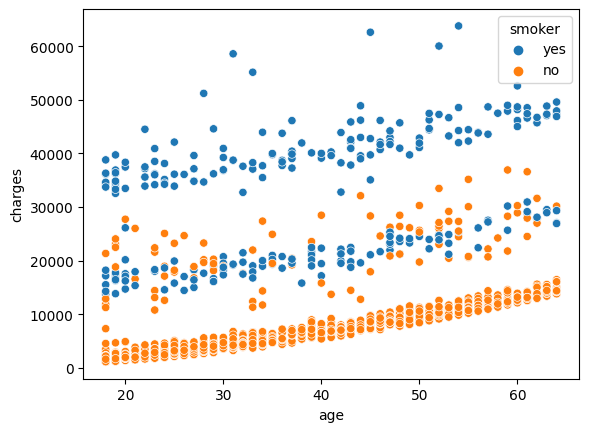

In [8]:
sns.scatterplot(x='age', y = 'charges', data=df, hue='smoker')
# the smoker feature has the greatest influence on the price of health insurance of all the other features.
# older ages mean more charges on health insurance

<Axes: xlabel='children', ylabel='charges'>

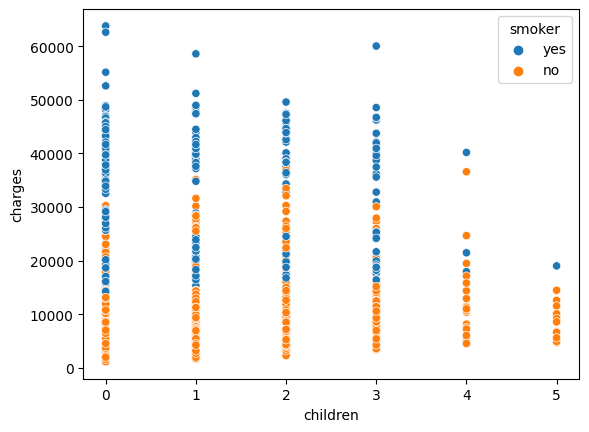

In [9]:
sns.scatterplot(x='children', y = 'charges', data=df, hue='smoker')

<Axes: xlabel='bmi', ylabel='charges'>

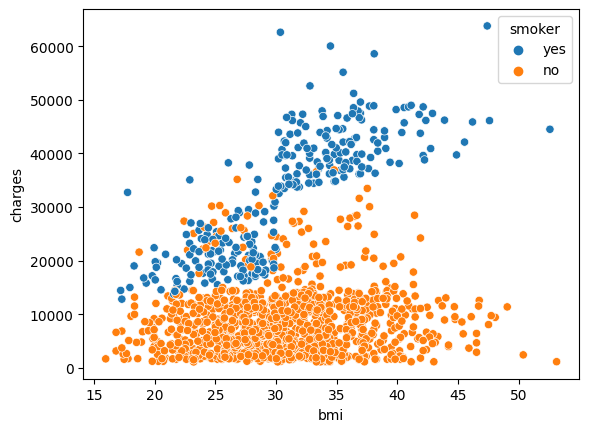

In [10]:
sns.scatterplot(x='bmi', y = 'charges', data=df, hue='smoker')
# bmi shows a slight curve increasing charges with higher value

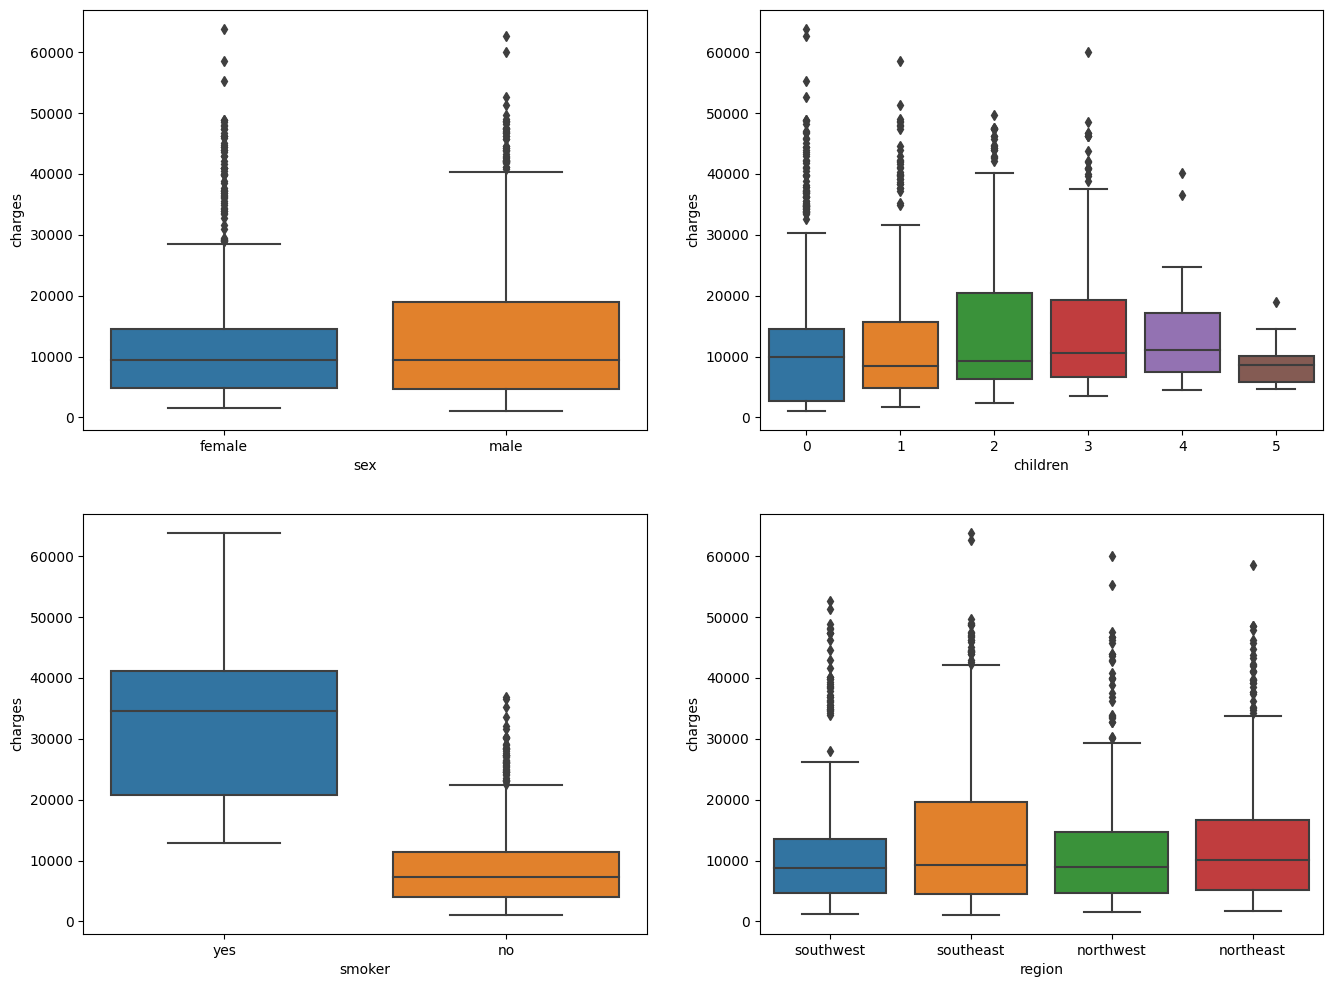

In [11]:
cat_plot_cols = ['sex','children','smoker','region']

f,axes = plt.subplots(nrows=2,ncols=2,figsize=(16,12))
for col,ax in zip(cat_plot_cols, axes.flatten()):
    sns.boxplot(x=col,y='charges',data=df, ax=ax)

C:\Users\Danbr\AppData\Local\Temp\ipykernel_6620\3533586271.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfc = df.corr()


<Axes: >

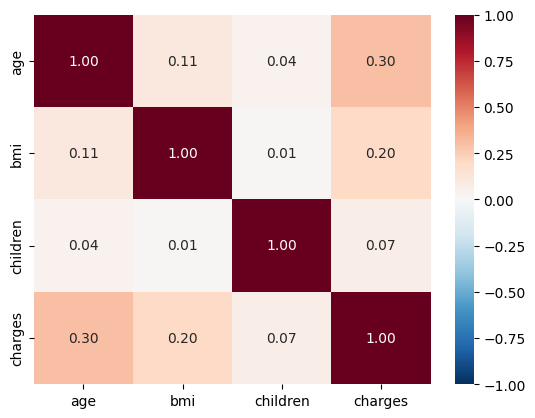

In [13]:
dfc = df.corr()

sns.heatmap(dfc, annot=True, fmt='.2f', center = 0, vmax=1, vmin=-1,cmap='RdBu_r')

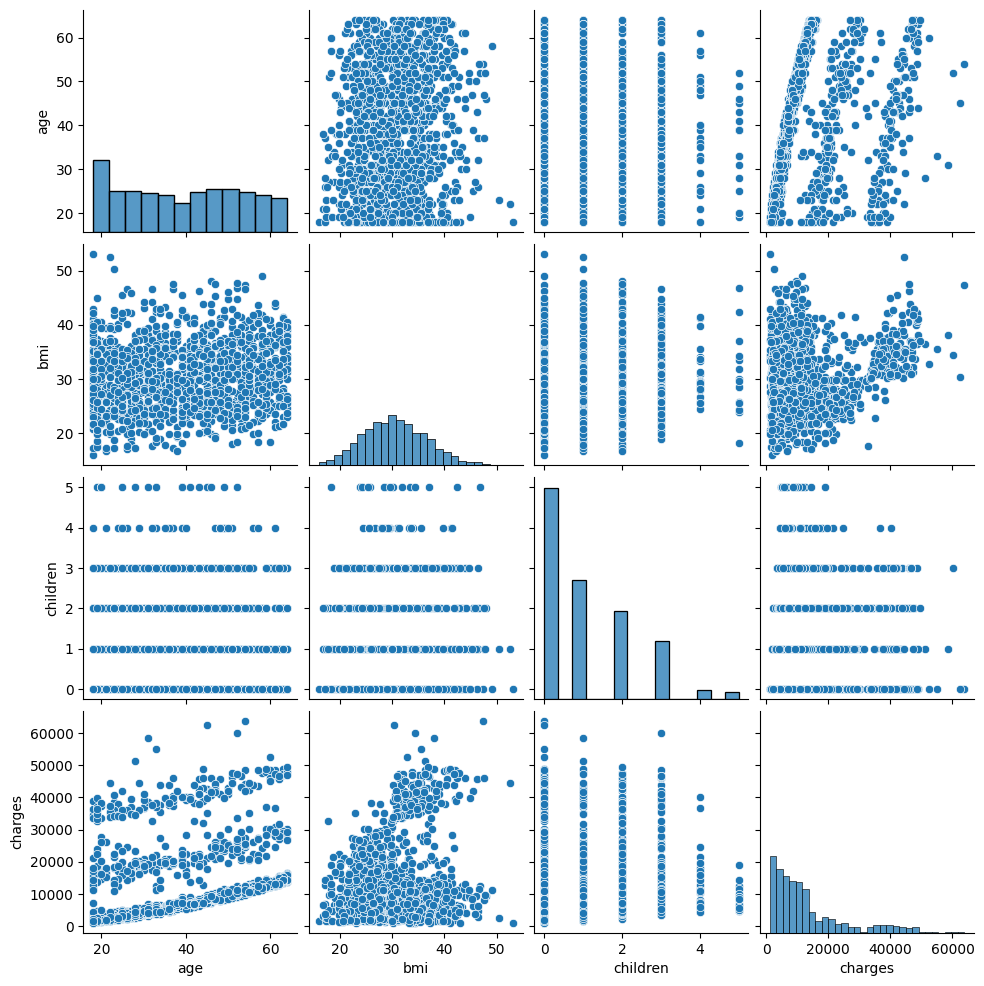

In [14]:
sns.pairplot(df)

#Modeling

In [15]:
NUMERICAL_FEATURES = ['age','bmi','children']
CATEGORICAL_FEATURES = ['sex','smoker','region']

FEATURES = NUMERICAL_FEATURES + CATEGORICAL_FEATURES
TARGET = 'charges'

In [17]:
X = df[FEATURES]
y = df[TARGET]

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=2024)

In [18]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

categorical_transformer = OneHotEncoder(drop='if_binary',handle_unknown='ignore', sparse_output=False)

preprocessor = ColumnTransformer([
    ('num', numerical_transformer, NUMERICAL_FEATURES),
    ('cat',categorical_transformer,CATEGORICAL_FEATURES)
])
preprocessor.fit_transform(X_train)

,num__age,num__bmi,num__children,cat__sex_male,cat__smoker_yes,cat__region_northeast,cat__region_northwest,cat__region_southeast,cat__region_southwest
149,0.021739,0.334679,0.2,1.0,0.0,0.0,0.0,0.0,1.0
98,0.826087,0.107345,0.0,1.0,1.0,1.0,0.0,0.0,0.0
739,0.239130,0.525693,0.4,1.0,1.0,0.0,0.0,0.0,1.0
707,0.673913,0.342480,0.6,1.0,0.0,0.0,1.0,0.0,0.0
572,0.260870,0.730697,0.4,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
183,0.565217,0.281141,0.0,0.0,0.0,0.0,1.0,0.0,0.0
446,0.913043,0.368039,0.0,1.0,0.0,1.0,0.0,0.0,0.0
539,0.760870,0.414044,0.0,1.0,0.0,0.0,0.0,1.0,0.0
640,0.326087,0.711326,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [19]:
model_pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',DummyRegressor())
])

model_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('model', DummyRegressor())])

In [20]:
params = {
    'model': [
        DummyRegressor(),
        LinearRegression(),
        LassoCV(),
        RidgeCV(),
        RandomForestRegressor(random_state=2023),
        GradientBoostingRegressor(random_state=2023)
    ]
}

grid_model = GridSearchCV(model_pipeline,params,cv=5,scoring='r2', verbose=1)
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['age',
                                                                          'bmi',
                                                                          'children']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='if_binary',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['sex',
                                                                          'smoker',
                                                                          'region'])])),
                                       ('model', DummyRegressor())]),
             param_grid={'model': [DummyRegressor(), LinearRegression(),
                                   LassoCV(), RidgeCV(),
                                   RandomForestRegressor(random_state=2023),
                                   GradientBoostingRegressor(random_state=2023)]},
             scoring='r2', verbose=1)

In [21]:
grid_model.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('model', GradientBoostingRegressor(random_state=2023))])

In [22]:
df_cv_results = pd.DataFrame(grid_model.cv_results_).sort_values('rank_test_score')
df_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,0.271800,0.020282,0.019202,0.003254,GradientBoostingRegressor(random_state=2023),{'model': GradientBoostingRegressor(random_sta...,0.811899,0.862054,0.824739,0.836850,0.909524,0.849013,0.034486,1
4,1.006400,0.023050,0.032803,0.000402,RandomForestRegressor(random_state=2023),{'model': RandomForestRegressor(random_state=2...,0.801371,0.839170,0.814981,0.826210,0.907353,0.837817,0.036937,2
2,0.318800,0.162022,0.042203,0.048448,LassoCV(),{'model': LassoCV()},0.737884,0.734553,0.729728,0.733422,0.804113,0.747940,0.028207,3
3,0.032606,0.006086,0.018395,0.002333,RidgeCV(),{'model': RidgeCV()},0.737525,0.734954,0.729580,0.733120,0.804391,0.747914,0.028357,4
1,0.038001,0.006542,0.024203,0.011034,LinearRegression(),{'model': LinearRegression()},0.737412,0.731358,0.729756,0.732848,0.803719,0.747019,0.028465,5
0,0.046000,0.016308,0.019000,0.005062,DummyRegressor(),{'model': DummyRegressor()},-0.009535,-0.000010,-0.007844,-0.029003,-0.018159,-0.012910,0.009900,6


In [23]:
model_pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',GradientBoostingRegressor(random_state=2024))
])

params = {
    'model__learning_rate':[0.1,0.01],
    'model__max_depth':[3,4,5],
    'model__n_estimators':[300,400,500],
    'model__subsample':[1.,.8]
}

grid_model = GridSearchCV(model_pipeline, params, cv=5,scoring='r2',n_jobs=-1,verbose=1)
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['age',
                                                                          'bmi',
                                                                          'children']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='if_binary',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['sex',
                                                                          'smoker',
                                                                          'region'])])),
                                       ('model',
                                        GradientBoostingRegressor(random_state=2024))]),
             n_jobs=-1,
             param_grid={'model__learning_rate': [0.1, 0.01],
                         'model__max_depth': [3, 4, 5],
                         'model__n_estimators': [300, 400, 500],
                         'model__subsample': [1.0, 0.8]},
             scoring='r2', verbose=1)

In [24]:
df_cv_results = pd.DataFrame(grid_model.cv_results_).sort_values('rank_test_score')
df_cv_results.loc[:,~df_cv_results.columns.str.contains('split|time')]

,param_model__learning_rate,param_model__max_depth,param_model__n_estimators,param_model__subsample,params,mean_test_score,std_test_score,rank_test_score
21,0.01,3,400,0.8,"{'model__learning_rate': 0.01, 'model__max_dep...",0.860259,0.032838,1
20,0.01,3,400,1.0,"{'model__learning_rate': 0.01, 'model__max_dep...",0.860068,0.032310,2
23,0.01,3,500,0.8,"{'model__learning_rate': 0.01, 'model__max_dep...",0.859552,0.033309,3
22,0.01,3,500,1.0,"{'model__learning_rate': 0.01, 'model__max_dep...",0.859196,0.032624,4
19,0.01,3,300,0.8,"{'model__learning_rate': 0.01, 'model__max_dep...",0.858716,0.032442,5
18,0.01,3,300,1.0,"{'model__learning_rate': 0.01, 'model__max_dep...",0.858184,0.032325,6
24,0.01,4,300,1.0,"{'model__learning_rate': 0.01, 'model__max_dep...",0.856149,0.034550,7
25,0.01,4,300,0.8,"{'model__learning_rate': 0.01, 'model__max_dep...",0.855637,0.033344,8
26,0.01,4,400,1.0,"{'model__learning_rate': 0.01, 'model__max_dep...",0.855206,0.035162,9
27,0.01,4,400,0.8,"{'model__learning_rate': 0.01, 'model__max_dep...",0.854352,0.034115,10


In [25]:
model_pipeline = grid_model.best_estimator_

In [26]:
y_pred = model_pipeline.predict(X_test)
get_metrics(y_test,y_pred)

{'R2': 0.8463726318682276,
 'MAE': 2629.1698188366386,
 'MAPE': 0.32926769342618184,
 'RMSE': 4704.149375549307}

<Axes: xlabel='charges'>

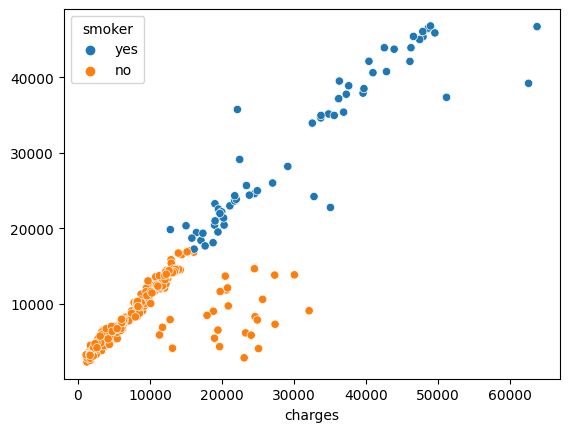

In [27]:
sns.scatterplot(x=y_test, y=y_pred, hue=X_test.smoker)
# y-axis represents predicted values, x-axis test values

In [28]:
# Access feature names after scaling (assuming 'scaler' is the first step)
scaler_feature_names = preprocessor.named_transformers_['num'].get_feature_names_out()

# Access feature names after one-hot encoding
encoder_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out()

# Combine feature names (assuming categorical features come after numerical)
all_feature_names = np.concatenate([scaler_feature_names, encoder_feature_names])

<Axes: >

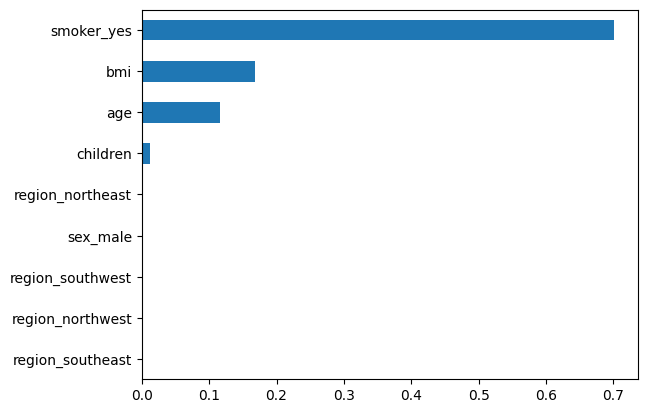

In [29]:
importances = pd.Series(
    data = model_pipeline.named_steps['model'].feature_importances_,
    index = all_feature_names
)

importances.sort_values().plot.barh()

# observe que as variáveis de região e sexo não tem importancia alguma

In [30]:
# numerical features still the same
# gender and region features don't matter

NUMERICAL_FEATURES = ['age','bmi','children']
CATEGORICAL_FEATURES = ['smoker']

FEATURES = NUMERICAL_FEATURES + CATEGORICAL_FEATURES
TARGET = 'charges'

X = df[FEATURES]
y= df[TARGET]

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=2024)

In [31]:
param_dict = {'model_learning_rate': 0.01, 'model_max_depth': 3, 'model_n_estimators': 400, 'model_subsample': 1.0}

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

categorical_transformer = OneHotEncoder(drop='if_binary',handle_unknown='ignore', sparse_output=False)

preprocessor = ColumnTransformer([
    ('num', numerical_transformer, NUMERICAL_FEATURES),
    ('cat',categorical_transformer,CATEGORICAL_FEATURES)
])

model_pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',GradientBoostingRegressor(learning_rate=param_dict['model_learning_rate'],
                                       max_depth=param_dict['model_max_depth'],
                                       n_estimators=param_dict['model_n_estimators'],
                                       subsample=param_dict['model_subsample'],
                                       random_state=2023
                                       )
                                       )
])



In [32]:
model_pipeline.fit(X_train,y_train)
y_pred = model_pipeline.predict(X_test)
get_metrics(y_test,y_pred)

{'R2': 0.845314762238067,
 'MAE': 2644.6279031237164,
 'MAPE': 0.3447077896024295,
 'RMSE': 4720.317846782652}

<Axes: xlabel='charges'>

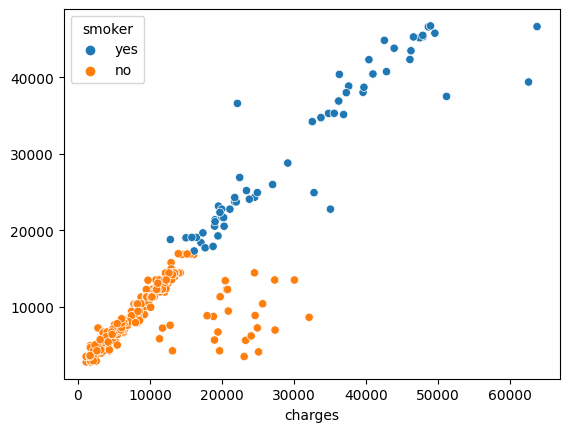

In [33]:
sns.scatterplot(x=y_test, y=y_pred, hue=X_test.smoker)


<Axes: >

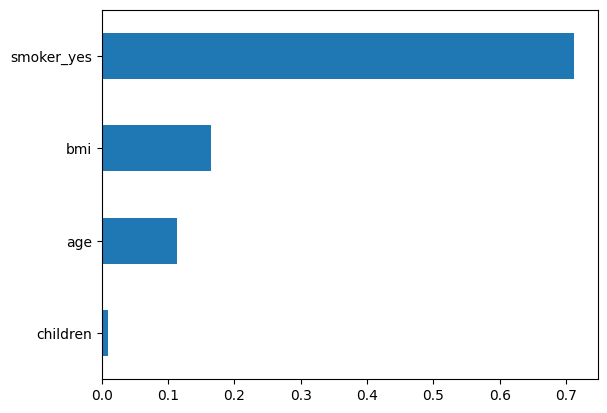

In [34]:
# Access feature names after scaling (assuming 'scaler' is the first step)
scaler_feature_names = preprocessor.named_transformers_['num'].get_feature_names_out()

# Access feature names after one-hot encoding
encoder_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out()

# Combine feature names (assuming categorical features come after numerical)
all_feature_names = np.concatenate([scaler_feature_names, encoder_feature_names])

importances = pd.Series(
    data = model_pipeline.named_steps['model'].feature_importances_,
    index = all_feature_names
)

importances.sort_values().plot.barh()


In [36]:
with open('models/model.pkl','wb') as file_model:
    pickle.dump(model_pipeline, file_model)